# Importar librerías y cargar dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset limpio
df = pd.read_csv("../data/processed/dataset_ready.csv")

print("[i] Filas:", df.shape[0], "Columnas:", df.shape[1])
df.head()


[i] Filas: 8120 Columnas: 149


,Player,Squad,Nation,Pos,Comp,Age,Born,Season,Competition,player_key,...,shooting__Expected npxG,shooting__Expected npxG/Sh,shooting__Expected G-xG,shooting__Expected np:G-xG,shooting__Unnamed: 26_level_0 Matches,date,market_value_in_eur,name_clean,year,season
0,Anthony Khelifa,Ajaccio,dz ALG,DF,fr Ligue 1,16.0,2005.0,2022-2023,big5,anthony khelifa,...,0.0,0.00,0.0,0.0,Matches,NaN,0.0,NaN,0.0,NaN
1,Ben Hamed Touré,Ajaccio,ci CIV,FW,fr Ligue 1,18.0,2003.0,2022-2023,big5,ben hamed toure,...,0.1,0.04,-0.1,-0.1,Matches,NaN,0.0,NaN,0.0,NaN
2,Benjamin Leroy,Ajaccio,fr FRA,GK,fr Ligue 1,33.0,1989.0,2022-2023,big5,benjamin leroy,...,0.0,0.00,0.0,0.0,Matches,2022-11-02,600000.0,benjamin leroy,2022.0,2022-2023
3,Bevic Moussiti-Oko,Ajaccio,cg CGO,FW,fr Ligue 1,27.0,1995.0,2022-2023,big5,bevic moussiti-oko,...,1.8,0.09,-0.8,-0.8,Matches,2022-11-02,700000.0,bevic moussiti-oko,2022.0,2022-2023
4,Clément Vidal,Ajaccio,fr FRA,"DF,MF",fr Ligue 1,22.0,2000.0,2022-2023,big5,clement vidal,...,0.8,0.06,0.2,0.2,Matches,2022-11-02,1500000.0,clément vidal,2022.0,2022-2023


# Resumen estadístico

In [13]:
# Estadísticas generales
df.describe(include="all").T

# Revisar valores nulos
df.isna().sum().sort_values(ascending=False).head(20)


keepers__Unnamed: 27_level_0 Matches    7511
date                                    1313
Player                                     0
Pos                                        0
Comp                                       0
Age                                        0
Born                                       0
Season                                     0
Competition                                0
player_key                                 0
squad_key                                  0
season_key                                 0
comp_key                                   0
Rk                                         0
standard__Playing Time MP                  0
standard__Playing Time Starts              0
standard__Playing Time Min                 0
Squad                                      0
Nation                                     0
standard__Performance Gls                  0
dtype: int64

### Análisis de valores nulos

Tras la limpieza, los únicos nulos restantes corresponden a columnas donde **NA no significa dato faltante, sino "no aplica"**:

- **`keepers__Unnamed: 27_level_0 Matches` (7511 nulos)**  
  → Solo aplica a porteros (`GK`). Los nulos en jugadores de campo son esperados y no requieren imputación.

- **`date` (1313 nulos)**  
  → Fecha de actualización del valor de mercado en Transfermarkt. Algunos jugadores no tienen registro en esa fecha.  
  Se mantiene para posibles análisis temporales.

Todas las demás columnas relevantes (`Player`, `Season`, `Pos`, `Age`, `Nation`, métricas de rendimiento y `market_value_in_eur`) no presentan nulos.  
Esto nos asegura que **no hay valores faltantes críticos para el modelado**.


# Distribución generales de variables 

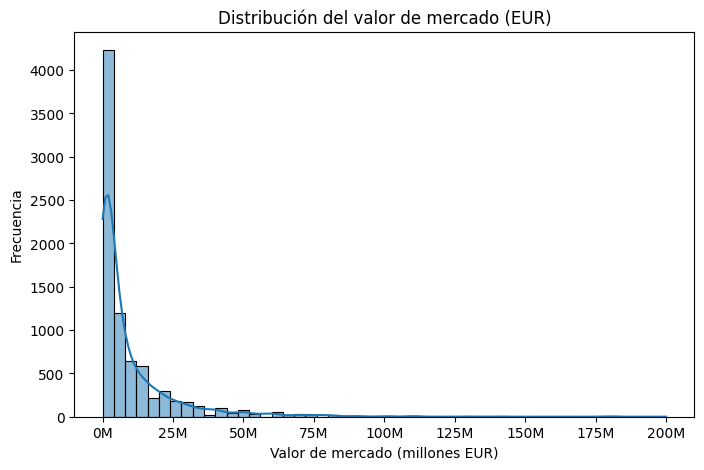

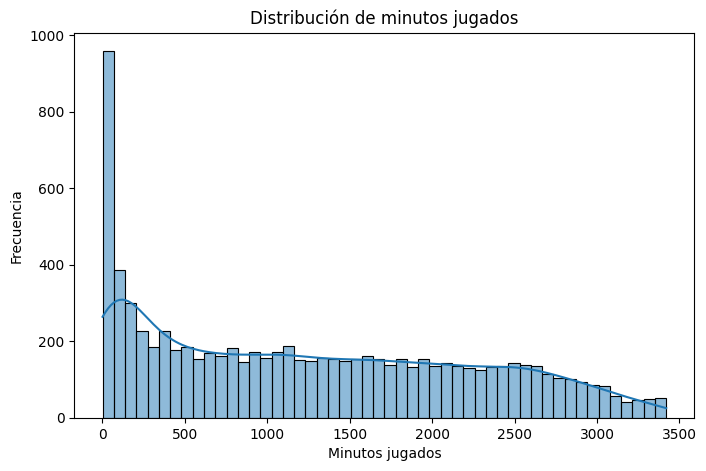

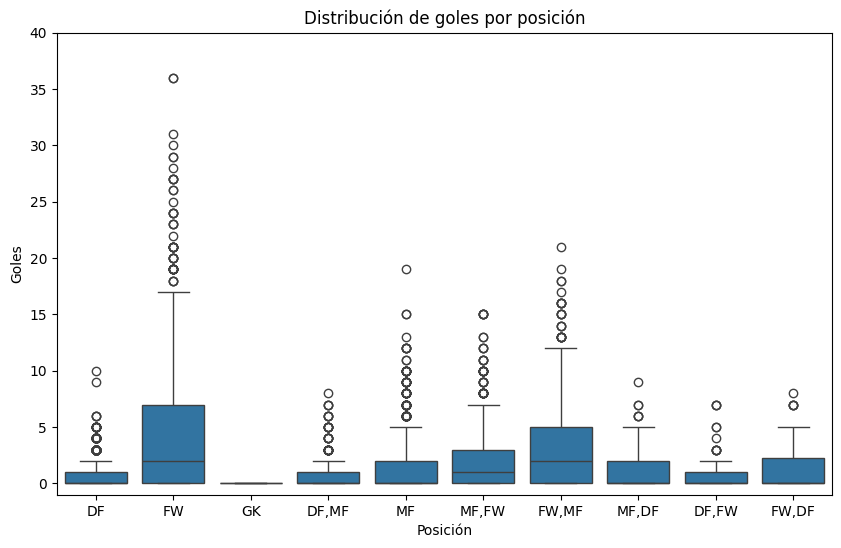

In [20]:
import matplotlib.ticker as mticker

# 1. Distribución de la variable objetivo (valor de mercado)
import matplotlib.ticker as mticker
plt.figure(figsize=(8,5))
sns.histplot(df["market_value_in_eur"], bins=50, kde=True)
plt.title("Distribución del valor de mercado (EUR)")
plt.xlabel("Valor de mercado (millones EUR)")
plt.ylabel("Frecuencia")

# Formatear eje X en millones
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.show()

# 2. Distribución de minutos jugados
plt.figure(figsize=(8,5))
sns.histplot(df["standard__Playing Time Min"], bins=50, kde=True)
plt.title("Distribución de minutos jugados")
plt.xlabel("Minutos jugados")
plt.ylabel("Frecuencia")
plt.show()

# 3.Distribución de goles por posición
# -----------------------------------------
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Pos", y="standard__Performance Gls")

plt.title("Distribución de goles por posición")
plt.xlabel("Posición")
plt.ylabel("Goles")
plt.ylim(-1, 40)  # limitar para ver mejor
plt.show()


In [23]:
[col for col in df.columns if "Gls" in col]# Top 5 jugadores con más goles (temporada total)
top_goleadores = (
    df[["Player", "Season", "Squad", "Pos", "standard__Performance Gls"]]
    .sort_values(by="standard__Performance Gls", ascending=False)
    .head(5)
)
top_goleadores

,Player,Season,Squad,Pos,standard__Performance Gls
2963,Harry Kane,2023-2024,Bayern Munich,FW,36
1476,Erling Haaland,2022-2023,Manchester City,FW,36
7409,Kylian Mbappé,2024-2025,Real Madrid,FW,31
2376,Harry Kane,2022-2023,Tottenham,FW,30
6825,Mohamed Salah,2024-2025,Liverpool,FW,29


# Correlaciones con market_value_in_eur

Top correlaciones positivas:
market_value_in_eur                 1.000000
standard__Expected npxG+xAG         0.487636
gca__GCA GCA                        0.479294
standard__Performance G+A           0.477387
gca__GCA Types PassLive             0.466951
gca__SCA Types PassLive             0.465503
shooting__Standard Sh               0.453386
gca__SCA SCA                        0.450029
shooting__Standard SoT              0.449887
standard__Expected xAG              0.441446
passing__Unnamed: 24_level_0 xAG    0.441446
standard__Expected npxG             0.440934
shooting__Expected npxG             0.440934
standard__Performance G-PK          0.437768
shooting__Expected xG               0.433979
Name: market_value_in_eur, dtype: float64

Top correlaciones negativas:
keepers__Playing Time MP       -0.001550
keepers__Performance Saves     -0.007428
keepers__Performance D         -0.007959
keepers__Penalty Kicks Save%   -0.007960
keepers__Penalty Kicks PKm     -0.008720
keepers__Performanc

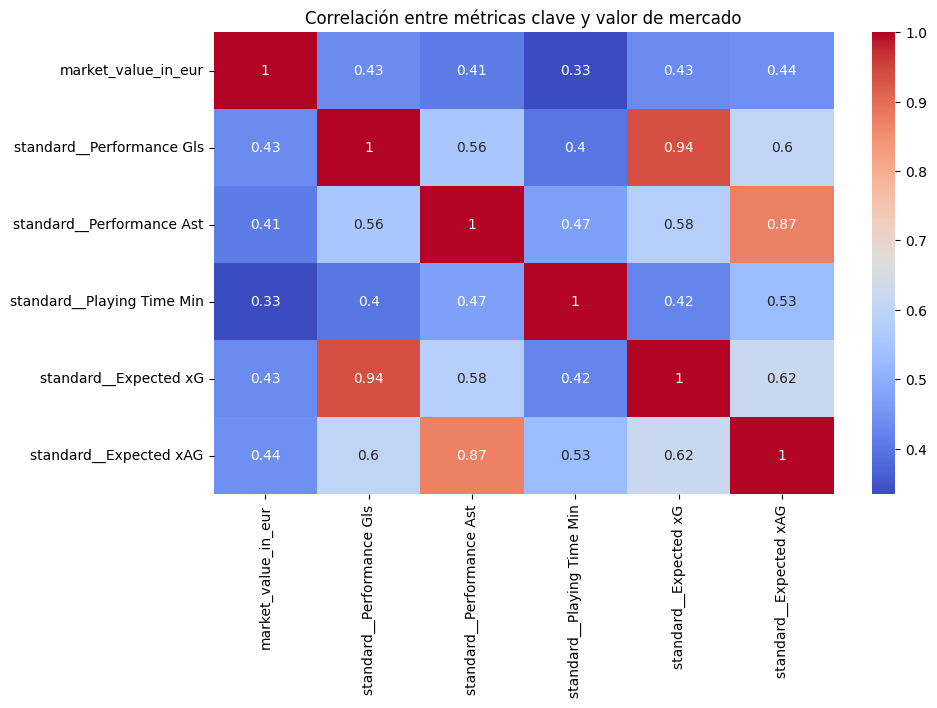

In [27]:
# Correlaciones con el valor de mercado

# Calcular correlación solo con variables numéricas
corr = df.corr(numeric_only=True)["market_value_in_eur"].sort_values(ascending=False)

print("Top correlaciones positivas:")
print(corr.head(15))

print("\nTop correlaciones negativas:")
print(corr.tail(15))

# Heatmap de correlaciones con algunas métricas clave
cols_interes = [
    "market_value_in_eur", 
    "standard__Performance Gls", 
    "standard__Performance Ast", 
    "standard__Playing Time Min", 
    "standard__Expected xG", 
    "standard__Expected xAG"
]

plt.figure(figsize=(10,6))
sns.heatmap(df[cols_interes].corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlación entre métricas clave y valor de mercado")
plt.show()



## Correlaciones entre métricas y valor de mercado

El análisis de correlación muestra las siguientes tendencias:

- **Goles (Gls) y xG**:  
  La correlación entre goles (`standard__Performance Gls`) y el valor de mercado es **moderada (0.43)**.  
  La métrica de goles esperados (`standard__Expected xG`) muestra prácticamente la misma correlación (0.43), lo cual indica que tanto el rendimiento real como el esperado influyen en la valoración del jugador.

- **Asistencias (Ast) y xAG**:  
  Las asistencias (`standard__Performance Ast`) tienen una correlación positiva (0.41), mientras que las asistencias esperadas (`standard__Expected xAG`) están ligeramente por encima (0.44).  
  Esto sugiere que el mercado también reconoce el potencial creativo aunque no siempre se traduzca en asistencias efectivas.

- **Minutos jugados**:  
  La correlación de minutos (`standard__Playing Time Min`) con el valor de mercado es más baja (0.33).  
  Esto refleja que jugar mucho no necesariamente aumenta el valor si no se acompaña de rendimiento ofensivo.

- **Otras métricas destacadas (top correlaciones globales)**:  
  - `standard__Expected npxG+xAG` (0.49): una métrica combinada de contribución ofensiva, es la de mayor correlación.  
  - Acciones que llevan a goles/asistencias (`gca__GCA GCA`, 0.48 y `gca__SCA Types PassLive`, 0.47) también destacan como buenos predictores.  
  - Métricas de porteros (ej. `keepers__Performance Save%`) o la edad tienen correlaciones negativas débiles, indicando que no explican bien el valor de mercado.

### Conclusión
El valor de mercado de los jugadores está **más asociado al impacto ofensivo (goles, asistencias, xG, xAG, GCA/SCA)** que al simple tiempo en cancha o métricas defensivas.  
Esto confirma que el mercado premia principalmente a los jugadores diferenciales en ataque.


## Detección de outliers


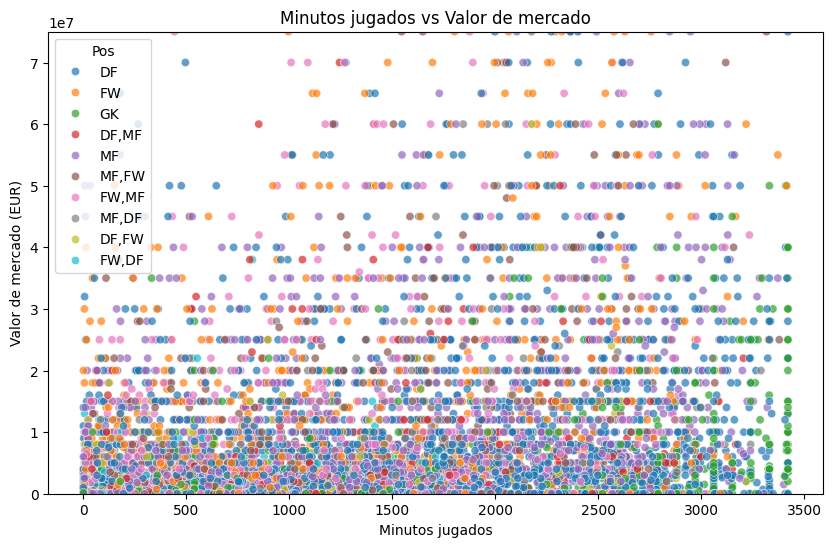

,Player,Season,Pos,Squad,market_value_in_eur,standard__Playing Time Min
6917,Erling Haaland,2024-2025,FW,Manchester City,200000000.0,2736
7408,Jude Bellingham,2024-2025,MF,Real Madrid,180000000.0,2488
1834,Kylian Mbappé,2022-2023,FW,Paris S-G,180000000.0,2818
4282,Erling Haaland,2023-2024,FW,Manchester City,180000000.0,2552
4780,Jude Bellingham,2023-2024,MF,Real Madrid,180000000.0,2315
4698,Kylian Mbappé,2023-2024,FW,Paris S-G,180000000.0,2158
5667,Lamine Yamal,2024-2025,FW,Barcelona,180000000.0,2856
1476,Erling Haaland,2022-2023,FW,Manchester City,170000000.0,2769
7409,Kylian Mbappé,2024-2025,FW,Real Madrid,160000000.0,2907
5475,Bukayo Saka,2024-2025,"FW,MF",Arsenal,150000000.0,1729


In [ ]:
# Detección de outliers: Minutos vs Valor mercado

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x="standard__Playing Time Min", 
    y="market_value_in_eur", 
    hue="Pos", 
    alpha=0.7
)

plt.title("Minutos jugados vs Valor de mercado")
plt.xlabel("Minutos jugados")
plt.ylabel("Valor de mercado (EUR)")
plt.ylim(0, df["market_value_in_eur"].quantile(0.99))  # limitar eje Y para no perder detalle
plt.show()

# --------------------------------------------
# Identificar jugadores outliers en valor de mercado
# (los que están en el top 1% más alto)
# --------------------------------------------
outliers = df[df["market_value_in_eur"] > df["market_value_in_eur"].quantile(0.99)]

outliers[["Player","Season","Pos","Squad","market_value_in_eur","standard__Playing Time Min"]] \
    .sort_values(by="market_value_in_eur", ascending=False) \
    .head(10)


## Detección de outliers

En el scatterplot de **minutos jugados vs valor de mercado**, la mayoría de jugadores se concentran en la parte baja (valores < 50M EUR), mientras que un grupo muy reducido aparece como **outliers** con valores de mercado superiores a 150M EUR.

El análisis del top 1% de valores de mercado muestra a jugadores de élite mundial, como:
- **Erling Haaland** (200M EUR en 2024–25, 2736 min)
- **Jude Bellingham** (180M EUR en 2024–25, 2488 min)
- **Kylian Mbappé** (180M EUR en 2022–23 y 2023–24, >2100 min)
- **Lamine Yamal** (180M EUR en 2024–25, 2856 min)
- **Bukayo Saka** (150M EUR en 2024–25, 1729 min)

Esto confirma que los valores extremos son reales (no errores de scraping) y corresponden a estrellas jóvenes con gran impacto en minutos jugados y rendimiento.
